<a href="https://colab.research.google.com/github/achanhon/coursdeeplearningcolab/blob/master/bow_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Sac de mot

L'objectif de ce tp est de coder une approche sac de mots : c'est ce qu'on faisait de mieux **avant** le deep learning.

Alternativement, vous pouvez aussi regarder les questions en fin de TP qui porte sur des méthodes d'auto encoding par deep learning (mais on est en limite de ce qu'on peut faire avec collab).


On va réutiliser MNIST que vous connaissez désormais.


## Création d'un dictionnaire

On va extraire un ensemble dense de patch dans des images MNIST et appliquer K moyenne dessus, cela nous donnera un dictionnaire de patches !

D'abord récupérons MNIST (avec torchvision -- juste par faciliter mais ce n'est pas pertinent).

In [ ]:
import torch
import torchvision
transform_mnist = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32,32)),
    torchvision.transforms.ToTensor()
])
mnisttrain = torchvision.datasets.MNIST("./mnist",train=True, transform=transform_mnist, download=True)
trainloader = torch.utils.data.DataLoader(mnisttrain, batch_size=64, shuffle=True, num_workers=2)
mnisttest = torchvision.datasets.MNIST("./mnist",train=False, transform=transform_mnist, download=True)
testloader = torch.utils.data.DataLoader(mnisttest, batch_size=64, shuffle=True, num_workers=2)

import matplotlib.pyplot as plt
import numpy as np
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

sample = next(iter(trainloader))[0]
show(torchvision.utils.make_grid(sample))
print(sample.shape)  ## 64 c'est le batch
                        ## 1 c'est du gris -- sinon ce serait 3 pour du RGB
                        ## 32x32 c'est pour la taille de l'image (petite ici)

**Q1** (moyen) : écrire une fonction qui extrait des patch 8x8 dans une image, les transforme en vecteur (flatten) et les mets dans une liste donnée en argument

In [ ]:
def extraitpatch2D(allpatch,inputs):
  print("TODO")

def extraitpatchinbatch(allpatch,inputs):
  for i in range(inputs.shape[0]):
      extraitpatch2D(allpatch,inputs[i][0].cpu().numpy())

**ATTENTION :** en fait c'est vraiment consommateur de ressource d'extraire autant de patches...

On vous fourniera une version qui tire de façon efficace des patchs à extraire au hasard de sorte que chaque position soit équiprobable.

**Q2 (facile)** : utiliser la fonction show64patches pour visualiser 64 patchs tirés au hasard et/ou les patchs extraits d'une image unique. Chacun apporte une information "faible" mais dans leur ensemble, on espère qu'ils encodent l'image.

In [ ]:
import random

def show64patch(patches):
  patches = [torch.Tensor(patches[i]) for i in range(64)]
  patches = [patch.view(8,8) for patch in patches]
  patches = [patch.unsqueeze(0) for patch in patches]
  patches = torch.stack(patches)
  show(torchvision.utils.make_grid(patches))

tmp = []

print("TODO")

**Q3 (facile)** Parcourer le dataset de train pour extraire "l'ensemble" des patchs de l'ensemble des images (normalement on utilise train **ET** test mais bon)

In [ ]:
allpatch = []
print("TODO")

**Q4 (moyen)** : Appliquer sklearn.cluster.KMeans pour créer un dictionnaire de 512 clusters

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


c'est normal si ça prend 10 mins !


In [ ]:
from sklearn.cluster import KMeans

print(len(allpatch)) ## on a un gros problème Kmeans !! 
                     ## dimension des vecteurs 64, 
                     ## K = 512
                     ## N = 600000

print("TODO")

**Q5 (facile)** : avez vous utiliser la classe des images jusqu'à maintenant ??

Non pour l'instant on utilise que de la données !

In [ ]:
del allpatch  ### libérer de la ram
print(kmeans.cluster_centers_.shape) ### vérification

## Encodage

L'objectif maintenant est d'utiliser le dictionnaire pour créer une fonction qui prend une image en entrée et qui produit un histogramme H avec h_i qui correspond au nombre de fois qu'on a vu un patch qui se rattache au groupe "i" du dictionnaire !

cette fois on extraira tous les patchs -- vu que de toute façon on va juste en conserver leur index


In [ ]:
def extractallpatch(allpatch,image):
  for row in range(image.shape[0]-8):
    for col in range(image.shape[1]-8):
        allpatch.append(image[row:row+8,col:col+8].copy().flatten())

def extraitallpatchinbatch(allpatch,inputs):
  for i in range(inputs.shape[0]):
      extractallpatch(allpatch,inputs[i][0].cpu().numpy())

**Q6 (facile)** : écrivez une fonction qui prend une liste contenant des entiers de 0 à 512 et qui retourne un histogramme de taille 512 avec h[i] le nombre de i dans la liste

In [ ]:

print("TODO")

**Q7 facile :** écrire une fonction qui trie les indices d'un tableau en fonction des valeurs associées

In [ ]:

print("TODO")


On va visualiser des "classes de patchs" **Attention** rien à voir avec la classe de l'image chat/chien -- on parle bien de la classe du patch vis à vis des K moyennes.

Seulement, les classes les plus communes sont probablement justes des patchs tout noir ou tout blanc, ils contiennent peu d'information...
d'un autre coté, si un groupe de patch contient 0 patch il n'est pas intéressant non plus...

Le code suivant récupère 3 indices contenant au moins 64 éléments sans qu'ils soient juste à coté...

In [ ]:
def get3index(histo):
  tmp = [(histo[i],i) for i in range(len(histo))]
  tmp = sorted(tmp)
  i = 0
  while tmp[i][0]<64:
    i+=1
  return tmp[i][1],tmp[i+4][1],tmp[i+8][1]

**Q8 (moyen)** : visualiser des patchs d'un même centroide (disons correspondant à 3 centres comme ci dessus)

*regarder l'exemple donnée dans la doc de scikit -- il vous permet de voir comment avoir le label associé à un patch*

*ATTENTION 1 seul "show64patch" par case de notebook*

le résultat des kmeans vous parait il pertinent ?



In [ ]:

sample = next(iter(trainloader))[0]
tmp = []

print("TODO")

In [ ]:

print("TODO")


In [ ]:

print("TODO")

**Q9 (moyen)** : écrire une fonction qui prend 1 image et produit l'histogramme associé

In [ ]:
print("TODO")

## Classification

**Q BONUS (pas si dur mais à la limite des moyens de calcul)** : parcourir l'ensemble du dataset de train, produire et stocker l'ensemble des histogrammes, puis apprendre un MLP (2 couches) ou arbre ou SVM sur ces histogrammes -> utiliser plutôt des classifiers scikit learn 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

https://scikit-learn.org/stable/modules/tree.html#classification

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification


Puis utiliser ce classifier sur les données de test -- (qu'il convient d'encoder au préalable)

In [ ]:
print("TODO")

===========================================================================

## Auto encodage

On va auto encoder les images - donc on va optimiser un modèle à regresser la donnée elle même

-> il n'y a donc que du "x" et pas de "y" (ce qui est normal pour ce TP sur le non supervisée)

voilà donc des fonctions "apprentissage/test" mais adapté au non supervisé

In [1]:
import torch


def compute_L1(batchprovider, net):
    with torch.no_grad():
        net.eval()
        net = net.cuda()
        nb, L1 = 0, 0
        for x, _ in batchprovider:
            x = x.cuda()
            z, _ = net(x)

            L1 += (x - z).abs().sum()
            nb += x.shape[0]
    return L1, nb


def training_epoch(batchprovider, net, lr):
    net.train()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    meanloss = 0
    nb, L1 = 0, 0
    for i, (x, _) in enumerate(batchprovider):
        x = x.cuda()
        z, _ = net(x)

        loss = (x - z).abs().sum()

        with torch.no_grad():
            meanloss += loss.clone().cpu().numpy()
            L1 += loss.clone().cpu().numpy()
            nb += x.shape[0]
            if i % 50 == 49:
                print("loss=", meanloss / 50)
                meanloss = 0

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(net.parameters(), 3)
        optimizer.step()

    return L1, nb


Par contre, ici le réseau ne doit pas prédire une classe mais bien produire une image, il faut donc écrire un réseau à la main qui fait ce type de tache

In [4]:

class MyAutoencoder(torch.nn.Module):
    def __init__(self, latent_space=16):
        super(MyAutoencoder, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.conv2 = torch.nn.Conv2d(16, 64, kernel_size=5, padding=2)
        self.l1 = torch.nn.Linear(64 * 7 * 7, latent_space)

        self.d1 = torch.nn.Linear(latent_space, 512)
        self.d2 = torch.nn.Linear(512, 512)
        self.d3 = torch.nn.Linear(512, 7 * 7 * 64)
        self.convd1 = torch.nn.Conv2d(64, 16, kernel_size=5, padding=2)
        self.convd2 = torch.nn.Conv2d(16, 1, kernel_size=5, padding=2)

        self.tmp = torch.nn.AdaptiveAvgPool2d((14, 14))
        self.tmp2 = torch.nn.AdaptiveAvgPool2d((28, 28))

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.nn.functional.max_pool2d(self.conv2(x), kernel_size=2, stride=2)
        x = x.view(x.shape[0], 64 * 7 * 7)

        code = torch.nn.functional.sigmoid(self.l1(x) * 100) * 10

        x = torch.nn.functional.leaky_relu(self.d1(code))
        x = torch.nn.functional.relu(self.d2(x))
        x = torch.nn.functional.relu(self.d3(x))
        x = x.view(x.shape[0], 64, 7, 7)

        x = torch.nn.functional.leaky_relu(self.convd1(self.tmp(x)))
        x = torch.nn.functional.sigmoid(self.convd2(self.tmp2(x)) * 100)

        return x, code


On peut maintenant appliquer ce réseau à MNIST

In [ ]:
import torchvision

net = MyAutoencoder()
net = net.cuda()

print("load data")
trainset = torchvision.datasets.MNIST(
    root="build",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)
testset = torchvision.datasets.MNIST(
    root="build",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=True, num_workers=2
)


In [5]:

print("train the model on the data")

for epoch in range(8):
    print("epoch", epoch)
    L1, nb = training_epoch(trainloader, net, 0.00001)
    print("train L1", L1 / nb)

print("eval model")
L1, nb = compute_L1(testloader, net)
print("test L1", L1 / nb)


load data
train the model on the data
epoch 0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


loss= 13499.38744140625
loss= 12457.26837890625
loss= 11487.30484375
loss= 10595.5625
loss= 9999.4964453125
loss= 9523.31490234375
loss= 9127.48275390625
loss= 8729.0262109375
loss= 8491.223916015624
train L1 80.86031052246094
epoch 1
loss= 8217.725078125
loss= 8090.51083984375
loss= 8026.642744140625
loss= 7934.1998828125
loss= 7831.10419921875
loss= 7802.143623046875
loss= 7660.40333984375
loss= 7624.09861328125
loss= 7576.137021484375
train L1 61.30629036458333
epoch 2
loss= 7495.608525390625
loss= 7456.249453125
loss= 7403.76921875
loss= 7347.797177734375
loss= 7286.288369140625
loss= 7249.278828125
loss= 7230.968505859375
loss= 7148.968642578125
loss= 7100.6816796875
train L1 56.9961411702474
epoch 3
loss= 7083.01490234375
loss= 7022.91845703125
loss= 7053.47783203125
loss= 7000.287236328125
loss= 6949.062197265625
loss= 6907.069423828125
loss= 6900.790703125
loss= 6860.770625
loss= 6792.79177734375
train L1 54.27356276855469
epoch 4
loss= 6801.295791015625
loss= 6755.355693359375

### Q1 : 
Afficher un paquet d'image

Puis la sortie du réseau

La forme globale est "correctement" reproduite alors qu'on a au coeur du réseau transformer l'image 28x28 en un vecteur de taille "latent_space"



In [ ]:
print("TODO")

### Q2

oui mais est ce que ce n'est qu'une compression ou est ce que c'est une compression qui conserve un peu de sémantique ??

pour le savoir affichons (dans l'espace) les "CODES" associé aus images

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


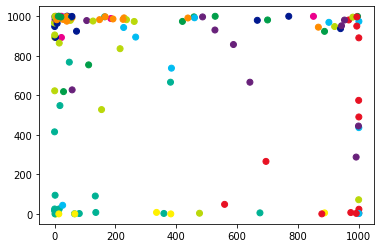

In [6]:
colors = [
    "#fff100",
    "#ff8c00",
    "#e81123",
    "#ec008c",
    "#68217a",
    "#00188f",
    "#00bcf2",
    "#00b294",
    "#009e49",
    "#bad80a",
]

import matplotlib.pyplot as plt

with torch.no_grad():
    x, y = next(iter(testloader))
    x = x.cuda()
    _, code = net(x)
    code = code.cpu().numpy()
    code *= 100

    C = [colors[y[i]] for i in range(128)]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(code[:, 0], code[:, 1], c=C)
    plt.show()

les points sont normalements +/- regroupés par couleur - mais probablement pas suffisamment - mais c'est normal puisque l'espace latent n'est pas juste 2

-> que se passe-t-il avec une espace latent de 2 ?
(en terme d'erreur et ou de regroupement des points)

In [ ]:
print("TODO")

### Q3

faites grossir le réseau pour obtenir une bonne compression et un bon regroupement
(il n'y aura pas de correction de cette question : actuellement je ne suis pas 100% sur que ce soit possible sur collab)

In [ ]:
print(TODO)